In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


In [28]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
mach = Symbol('M')


# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
h = (u**2 + 2*cs**2)/(3*pi*G*sigmatot)
nu = (delta*sigmasfr)/(2*h*mstar)
alphak = calpha*tau**2*(u**2)*omega/h
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


sigmatot


Sigma_tot

## Model 1

### Evaluating expressions

In [29]:
l = cl*h
a = [(u, mach*cs)]
h = simplify(h.subs(a))
h


T*gamma*k_B*(M**2 + 2)/(3*pi*G*Sigma_tot*m_H*mu)

In [30]:
l = simplify(l.subs(a))
l


C_l*T*gamma*k_B*(M**2 + 2)/(3*pi*G*Sigma_tot*m_H*mu)

In [31]:
u = simplify(u.subs(a))
u


M*sqrt(T*gamma*k_B/(m_H*mu))

In [32]:
tau = l/u
tau = simplify(tau.subs(a))
tau


C_l*sqrt(T*gamma*k_B/(m_H*mu))*(M**2 + 2)/(3*pi*G*M*Sigma_tot)

In [33]:
rho = sigma/(2*h)
Beq = u*(4*pi*rho)**Rational(1/2)
biso = (Beq*(xio**(1/2)))/Max(1, mach)
biso = simplify(biso.subs(a))
biso = biso.powsimp(force=True)
biso


sqrt(6)*pi*M*xi_0**0.5*sqrt(G*Sigma_tot*\Sigma/(M**2 + 2))/Max(1, M)

In [34]:
bani = biso*(Rational(2/3)*q*omega)**Rational(1/2)*(tau**Rational(1/2))

bani = simplify(bani.subs(a))
bani = bani.powsimp(force=True)
bani


3*sqrt(667199944795629)*sqrt(pi)*M*xi_0**0.5*sqrt(C_l*\Omega*\Sigma*q*sqrt(T*gamma*k_B/(m_H*mu))/M)/(67108864*Max(1, M))

In [35]:
eta = tau*(u**2)/3
Rk = Symbol('R_k')
Dk = -(9*calpha*q*(h**2)*(omega**2))/u**2
Dc = -(pi**5)/32
rho = sigma/(2*h)
Beq = (4*pi*rho)**Rational(1/2)*u
Bbar = (pi*Beq*l*(Rk*(Dk/Dc))**Rational(1/2))/h

Bbar = simplify(Bbar.subs(a))
Bbar = Bbar.powsimp(force=True)
Bbar


8*sqrt(3)*C_l*M*sqrt(C_alpha*R_k*T*\Omega**2*\Sigma*gamma*k_B*q*(M**2 + 2)/(G*M**2*Sigma_tot*m_H*mu))/pi**(3/2)

In [36]:
tanpb = -((pi**2)*tau*(u**2))/(12*q*omega*(h**2))
tanpb = simplify(tanpb.subs(a))
tanpb = tanpb.subs([(tau, tau), (l, l)])
tanpb = simplify(tanpb)
tanpb


-pi**3*C_l*G*M*Sigma_tot*m_H*mu*sqrt(T*gamma*k_B/(m_H*mu))/(4*T*\Omega*gamma*k_B*q*(M**2 + 2))

In [37]:
quantities = [ h, l, u, tau, biso, bani, Bbar, tanpb ]
import pickle
with open("model1.txt", "wb") as outf:
    pickle.dump(quantities, outf)

The power to which the observable Sigma_tot is raised is: -1/2


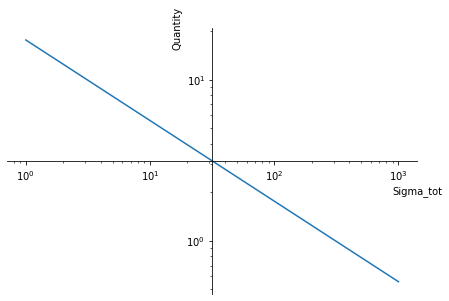

The power to which the observable \Sigma is raised is: 1/2


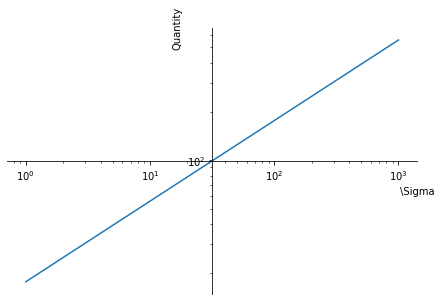

The power to which the observable Sigma_SFR is raised is: 0


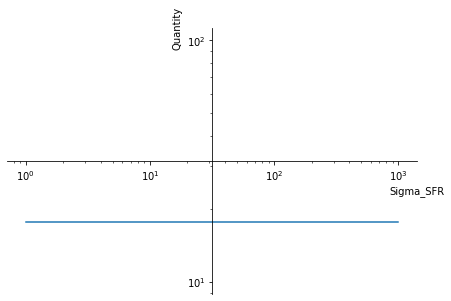

The power to which the observable \Omega is raised is: 1


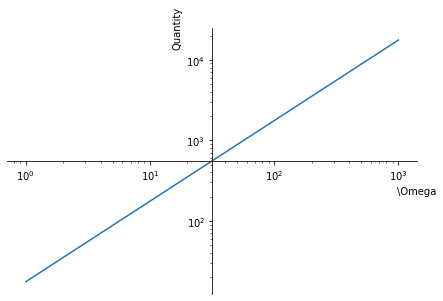

The power to which the observable q is raised is: 1/2


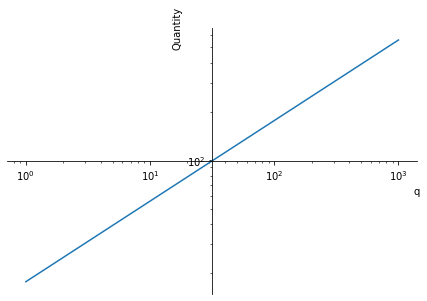

The power to which the observable T is raised is: 1/2


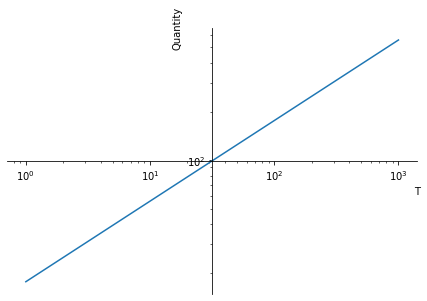

The scaling relation is 


sqrt(T)*\Omega*sqrt(\Sigma)*sqrt(q)/sqrt(Sigma_tot)

In [38]:
from sympy.plotting import plot3d, plot
const = [(gamma, 1), (boltz, 1), (mh, 2), (mu, 1), (mach, sqrt(2)),
         (G, 1), (cl, 5), (xio, 0.4), (kappa, 1), (calpha, 1), (Rk, 1)]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1)]

# quantity to be plotted
quan = Bbar
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
# powers for scaling relations
powe = []
# plotting the scaling relations
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                 (omega, 1), (q, 1), (T, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = quan.subs(final)
    powe.append(diff(log(z), obs)*obs)
    print('The power to which the observable {} is raised is: {}'.format(
        str(obs), diff(log(z), obs)*obs))
    p = plot(z, (obs, 1, 1000), xscale='log',
             yscale='log', xlabel=obs, ylabel='Quantity')
    p.show

# verifying scaling relation
scaling = np.power(observ, powe)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation
